In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import GridSearchCV
from scipy import stats

In [ ]:
input_data = pd.read_csv("/content/drive/MyDrive/IN_Table.csv")
output_data = pd.read_csv("/content/drive/MyDrive/OUT_Table.csv")

In [ ]:
data = pd.concat([input_data,output_data], axis=1)
data

,IN1,IN2,IN3,IN4,IN5,Out1,Out2
0,0.077744,0.795565,-0.665503,0.879321,0.134419,-0.122686,0.123661
1,0.080313,0.824595,-0.655447,0.875636,0.134941,-0.122686,0.123661
2,0.087355,0.776258,-0.650550,0.884105,0.132452,-0.026857,0.123661
3,0.091774,0.739149,-0.644934,0.892043,0.131287,-0.026857,0.251010
4,0.091166,0.761332,-0.648654,0.892752,0.136788,-0.026857,0.251010
...,...,...,...,...,...,...,...
14396,-2.371841,-1.399878,-2.594168,-0.861832,-1.607387,-2.039274,-1.531870
14397,-2.378745,-1.407683,-2.601522,-0.871577,-1.604817,-2.039274,-1.531870
14398,-2.385070,-1.388787,-2.606594,-0.880330,-1.579605,-1.943445,-1.659219
14399,-2.386119,-1.372492,-2.615738,-0.886744,-1.556761,-1.943445,-1.659219


In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
data2 = data.drop(['Out1'],axis=1)
data2

,IN1,IN2,IN3,IN4,IN5,Out2
0,0.077744,0.795565,-0.665503,0.879321,0.134419,0.123661
1,0.080313,0.824595,-0.655447,0.875636,0.134941,0.123661
2,0.087355,0.776258,-0.650550,0.884105,0.132452,0.123661
3,0.091774,0.739149,-0.644934,0.892043,0.131287,0.251010
4,0.091166,0.761332,-0.648654,0.892752,0.136788,0.251010
...,...,...,...,...,...,...
14396,-2.371841,-1.399878,-2.594168,-0.861832,-1.607387,-1.531870
14397,-2.378745,-1.407683,-2.601522,-0.871577,-1.604817,-1.531870
14398,-2.385070,-1.388787,-2.606594,-0.880330,-1.579605,-1.659219
14399,-2.386119,-1.372492,-2.615738,-0.886744,-1.556761,-1.659219


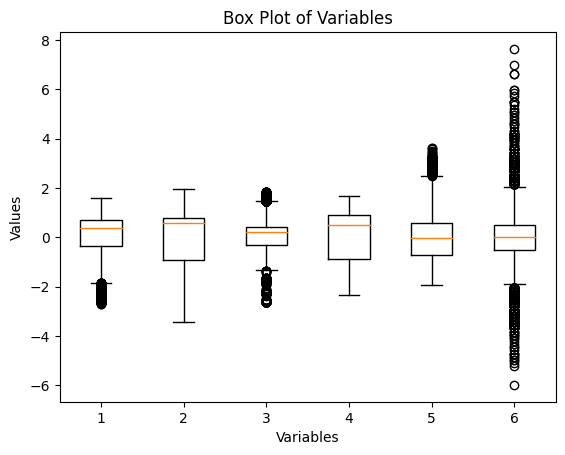

In [ ]:
plt.boxplot(data2[['IN1', 'IN2', 'IN3','IN4', 'IN5','Out2']])
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot of Variables')
plt.show()

In [ ]:
outlier_counts = {}

for column in data2.columns:
    q1 = data2[column].quantile(0.25)
    q3 = data2[column].quantile(0.75)
    iqr = q3 - q1
    outliers = data2[column][(data2[column] < q1 - 1.5 * iqr) | (data2[column] > q3 + 1.5 * iqr)]
    outlier_counts[column] = len(outliers)

print("Outlier counts:", outlier_counts)

Outlier counts: {'IN1': 1415, 'IN2': 0, 'IN3': 2420, 'IN4': 0, 'IN5': 248, 'Out2': 763}


In [ ]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
IN1,14401.0,-2.368311e-14,1.0,-2.696646,-0.338584,0.361759,0.684244,1.590639
IN2,14401.0,-6.012353e-14,1.0,-3.437986,-0.937182,0.570995,0.761058,1.939639
IN3,14401.0,-7.420709e-15,1.0,-2.639204,-0.301319,0.224860,0.401143,1.844610
IN4,14401.0,-2.090429e-14,1.0,-2.354538,-0.879161,0.503408,0.886232,1.654608
IN5,14401.0,-6.631272e-16,1.0,-1.934470,-0.713098,-0.041588,0.572189,3.615581
Out2,14401.0,4.862933e-14,1.0,-5.989071,-0.513082,-0.003688,0.505707,7.637227


In [ ]:
columns_to_scale = ['IN1', 'IN2', 'IN3', 'IN4', 'IN5', 'Out2']
scaler = MinMaxScaler(feature_range=(-1.5,1.5))
data2[columns_to_scale] = scaler.fit_transform(data2[columns_to_scale])
data2[columns_to_scale] += (0.25 - data2[columns_to_scale].quantile(0.75))

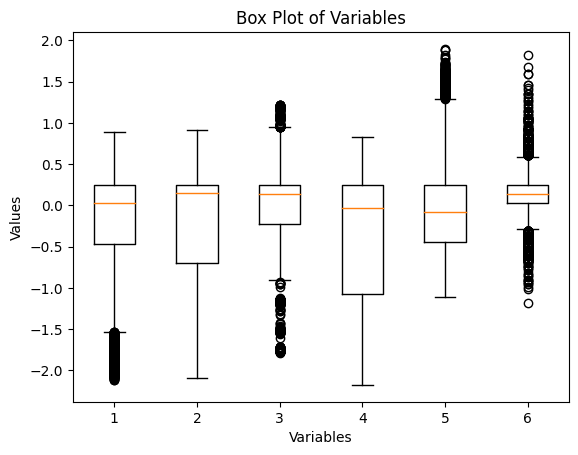

In [ ]:
plt.boxplot(data2[['IN1', 'IN2', 'IN3','IN4', 'IN5','Out2']])
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot of Variables')
plt.show()

In [ ]:
inputs = data2.drop(['Out2'],axis=1)
target = data2[['Out2']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_reshaped = X_train_scaled.reshape(-1, 1, inputs.shape[1])
X_test_reshaped = X_test_scaled.reshape(-1, 1, inputs.shape[1])

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint

def swish(x):
    return x * K.sigmoid(x)

model = Sequential()
model.add(LSTM(256, input_shape=(1, inputs.shape[1]), return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(200, activation=swish))
model.add(Dense(target.shape[1]))

model.compile(loss='mean_squared_error', optimizer='nadam')

# Train the model with the updated parameters and callbacks
model.fit(X_train_reshaped, y_train, epochs=300, batch_size=32, validation_data=(X_test_reshaped,y_test))

Epoch 1/300
315/315 [==============================] - 20s 38ms/step - loss: 0.0409 - val_loss: 0.0368
Epoch 2/300
315/315 [==============================] - 11s 35ms/step - loss: 0.0386 - val_loss: 0.0359
Epoch 3/300
315/315 [==============================] - 10s 32ms/step - loss: 0.0381 - val_loss: 0.0352
Epoch 4/300
315/315 [==============================] - 11s 36ms/step - loss: 0.0372 - val_loss: 0.0350
Epoch 5/300
315/315 [==============================] - 10s 32ms/step - loss: 0.0370 - val_loss: 0.0351
Epoch 6/300
315/315 [==============================] - 10s 32ms/step - loss: 0.0365 - val_loss: 0.0349
Epoch 7/300
315/315 [==============================] - 10s 32ms/step - loss: 0.0363 - val_loss: 0.0338
Epoch 8/300
315/315 [==============================] - 11s 35ms/step - loss: 0.0359 - val_loss: 0.0339
Epoch 9/300
315/315 [==============================] - 11s 34ms/step - loss: 0.0356 - val_loss: 0.0338
Epoch 10/300
315/315 [==============================] - 11s 34ms/step - l

In [ ]:
y_pred = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

136/136 [==============================] - 2s 5ms/step
Mean Squared Error: 0.021121484017672342


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

R-squared Score: 0.5455992850669029


In [ ]:
nmrse = np.sqrt(mse) / np.mean(y_test)
print(f"NMRSE: {nmrse}")

NMRSE: Out2    1.041093
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.10042060803160022


In [ ]:
accuracy = 1 - mse
print("Accuracy:", accuracy)

Accuracy: 0.9788785159823277


In [ ]:
model.save('/content/drive/MyDrive/Model_GUI1/H2S_Model_GUI.h5')